# **Scale-Invariant Feature Transform**



---



---





**INTRODUCTION :**

---

SIFT, or Scale Invariant Feature Transform, is a feature detection algorithm in Computer Vision.

SIFT helps to locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariant that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

We can also use the keypoints generated using SIFT as features for the image during model training. The major advantage of SIFT features, over edge features or hog features, is that they are not affected by the size or orientation of the image.

It was created by David Lowe from the University British Columbia in 1999. David Lowe presents the SIFT algorithm in his original paper titled Distinctive Image Features from Scale-Invariant Keypoints.

Image features extracted by SIFT are reasonably invariant to various changes such as their llumination image noise, rotation, scaling, and small changes in viewpoint.

**There are five main stages involved in SIFT algorithm :**

**1] Scale-space extrema detection**

To detect larger corners we need larger windows. For this, scale-space filtering is used. In it, Laplacian of Gaussian is found for the image with various sigma values. LoG acts as a blob detector which detects blobs in various sizes due to change in sigma. In short, sigma acts as a scaling parameter. 

SIFT algorithm uses Difference of Gaussians which is an approximation of LoG. Difference of Gaussian is obtained as the difference of Gaussian blurring of an image with two different sigma, let it be sigma and k-sigma. This process is done for different octaves of the image in Gaussian Pyramid. It is represented in below image:






In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

In [ ]:
uploaded=files.upload()

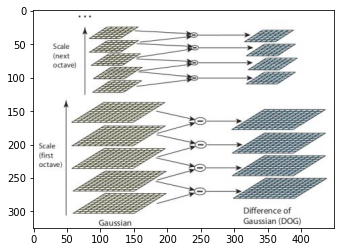

In [ ]:
img=cv2.imread('sift.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)


Once this DoG are found, images are searched for local extrema over scale and space. For eg, one pixel in an image is compared with its 8 neighbours as well as 9 pixels in next scale and 9 pixels in previous scales. If it is a local extrema, it is a potential keypoint. It basically means that keypoint is best represented in that scale. It is shown in below image:





In [ ]:
uploaded=files.upload()

Saving sift1.jpg to sift1.jpg


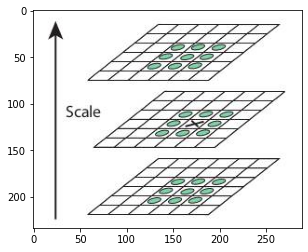

In [ ]:
img=cv2.imread('sift1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

Regarding different parameters, the paper gives some empirical data which can be summarized as, number of octaves = 4, number of scale levels = 5, initial sigma=1.6, k=sqrt{2} etc as optimal values.

The scale space is defined by the function:

      L(x, y, σ) = G(x, y, σ) * I(x, y) 

Where:

L is the blurred image

G is a Gaussian blur operator

I is the input image

σ acts as a scale parameter ( Higher value results in more blur)

So, we first take the original image and blur it using a Gaussian convolution. What follows is a sequence of further convolutions with increasing standard deviation(σ). Images of same size (with different blur levels) are called an Octave. Then, we downsize the original image by a factor of 2. This starts another row of convolutions. We repeat this process until the pictures are too small to proceed.

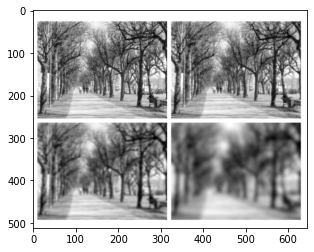

In [ ]:
img=cv2.imread('SIFT.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

**2] Keypoint localization**

Once potential keypoints locations are found, they have to be refined to get more accurate results. They used Taylor series expansion of scale space to get more accurate location of extrema, and if the intensity at this extrema is less than a threshold value (0.03 as per the paper), it is rejected. This threshold is called contrastThreshold in OpenCV

DoG has higher response for edges, so edges also need to be removed. For this, a concept similar to Harris corner detector is used. They used a 2x2 Hessian matrix (H) to compute the pricipal curvature. We know from Harris corner detector that for edges, one eigen value is larger than the other. So here they used a simple function,

If this ratio is greater than a threshold, called edgeThreshold in OpenCV, that keypoint is discarded. It is given as 10 in paper.

So it eliminates any low-contrast keypoints and edge keypoints and what remains is strong interest points.


**Local Maxima and Local Minima**


To locate the local maxima and minima, we go through every pixel in the image and compare it with its neighboring pixels.

When I say ‘neighboring’, this not only includes the surrounding pixels of that image (in which the pixel lies), but also the nine pixels for the previous and next image in the octave.




**3] Orientation Assignment**

Now an orientation is assigned to each keypoint to achieve invariance to image rotation. A neigbourhood is taken around the keypoint location depending on the scale, and the gradient magnitude and direction is calculated in that region. An orientation histogram with 36 bins covering 360 degrees is created. (It is weighted by gradient magnitude and gaussian-weighted circular window with \sigma equal to 1.5 times the scale of keypoint. The highest peak in the histogram is taken and any peak above 80% of it is also considered to calculate the orientation. It creates keypoints with same location and scale, but different directions. It contribute to stability of matching.

**4] Keypoint descriptor**

Now keypoint descriptor is created. A 16x16 neighbourhood around the keypoint is taken. It is devided into 16 sub-blocks of 4x4 size. For each sub-block, 8 bin orientation histogram is created. So a total of 128 bin values are available. It is represented as a vector to form keypoint descriptor. In addition to this, several measures are taken to achieve robustness against illumination changes, rotation etc.

**5] Keypoint Matching**


Keypoints between two images are matched by identifying their nearest neighbours. But in some cases, the second closest-match may be very near to the first. It may happen due to noise or some other reasons. In that case, ratio of closest-distance to second-closest distance is taken. If it is greater than 0.8, they are rejected. It eliminaters around 90% of false matches while discards only 5% correct matches, as per the paper.

So this is a summary of SIFT algorithm. For more details and understanding, reading the original paper is highly recommended. Remember one thing, this algorithm is patented. So this algorithm is included in Non-free module in OpenCV.

**MAJOR ADVANTAGES OF SIFT :**  

---
**Locality**

Before we go through details, we should know first what is local feature and what is the difference between local and global features?
Basically there are two types of features that can be extracted from an image, they are global and local features. Global features describe the image as a whole to generalize the entire object. It includes contour representations, shape descriptors, and texture features such as shape matrices and Histogram of Gradient (HOG). Local features describe the image patches (key points in the image) of an object. The example of local features are SIFT and SURF. Generally, global features are used for low level applications such as object detection and classification and for higher level applications such as object recognition, local features are used because it is more robust to occlusion and clutter than global features.

**Distinctive**


Individual feature extracted by SIFT has very distinctive descriptor, which allows a single feature to find its correct match with good probability in a large database of features.

**Quantity**

One major advantage of SIFT is it can generates large numbers of features that densely cover the image over the full range scales and locations. For instance, it is possible to collect 2000 stable features from a typical image of size 500×500 pixels. As we know that the quantity of features is important for object recognition, where to detect the small objects in cluttered background, it requires at least 3 features from each object to be correctly matched for reliable identification.

**Efficiency**

The performance of SIFT is close to real-time performance

**Extensibility:** can easily be extended to a wide range of different feature types, with each adding robustness

**DISADVANTAGES OF SIFT :**

---


SIFT uses 128 dimensional feature vectors which are big and computational cost of SIFT due to this rises.

SIFT continues to be a good detector when the images that are to be matches are nearly identical but even a relatively small change will produce a big drop in matching keypoints.

SIFT cannot find too many points in the image that are resistant to scale, rotation and distortion if the original image is out of focus (blurred). Thus, it does not work well if the images are blurred.

**SIFT Feature Extraction Using OpenCV in Python**



---



In [ ]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg".split())



In [ ]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
figsize = (10, 10)


In [ ]:
rgb_l = cv2.cvtColor(cv2.imread("left.jpg"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("right.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

**SIFT feature detection and description**

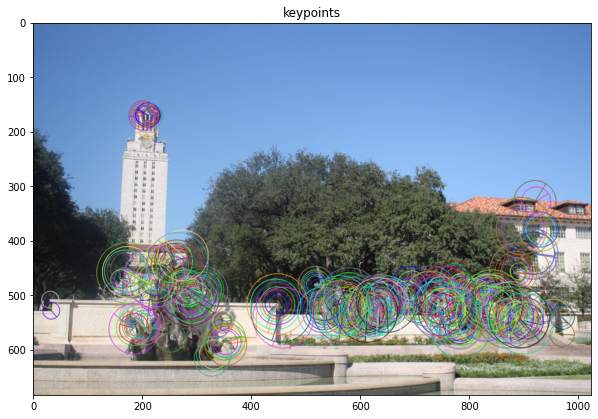

In [ ]:
# use orb if sift is not installed
#feature_extractor = cv2.SIFT_create()
feature_extractor = cv2.ORB_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(rgb_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()
#orb = cv2.ORB_create(nfeatures=1500)

**Taking Only Unique Features :**

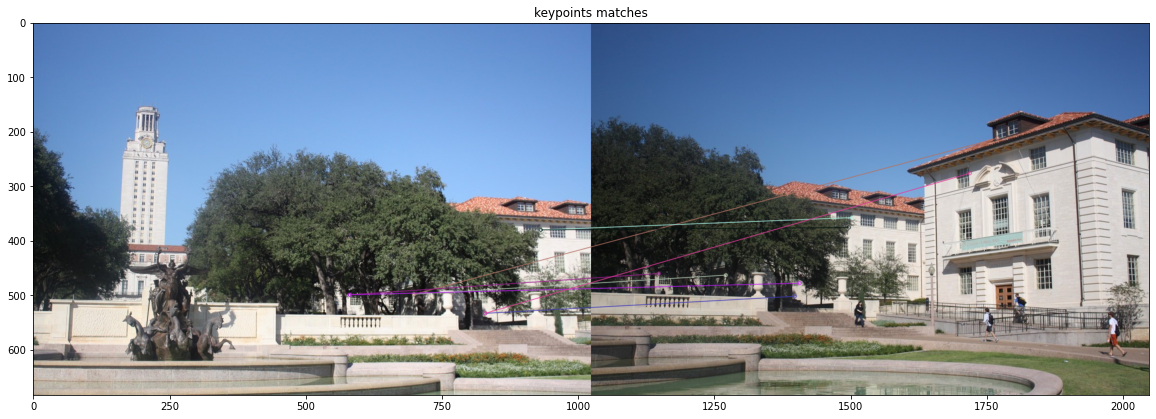

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
    if m[0].distance/m[1].distance < 0.5:
        good_and_second_good_match_list.append(m)
good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_and_second_good_match_list[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()


**Finding homography between images**

In [ ]:
good_kp_l = np.array([kp_l[m.queryIdx].pt for m in good_match_arr])
good_kp_r = np.array([kp_r[m.trainIdx].pt for m in good_match_arr])
H, masked = cv2.findHomography(good_kp_r, good_kp_l, cv2.RANSAC, 5.0)

print(H)


[[ 8.17105136e-01  1.34392094e-01  4.22764355e+02]
 [-1.37448987e-01  1.00338918e+00  5.86980268e+01]
 [-2.12239412e-04  7.55681039e-05  1.00000000e+00]]


**Overlay images**

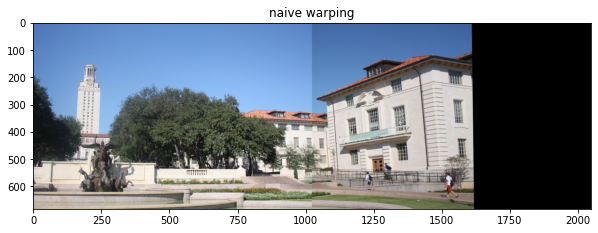

In [ ]:
rgb_r_warped = cv2.warpPerspective(rgb_r, H, (rgb_l.shape[1] + rgb_r.shape[1], rgb_l.shape[0]))
rgb_r_warped[0:rgb_l.shape[0], 0:rgb_l.shape[1]] = rgb_l

plt.figure(figsize=figsize)
plt.imshow(rgb_r_warped)
plt.title("naive warping")
plt.show()

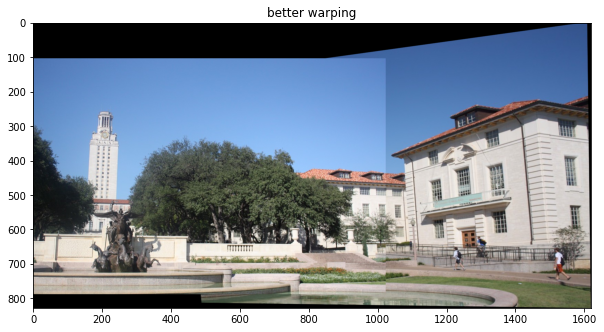

In [ ]:
def warpTwoImages(img1, img2, H):
    '''warp img2 to img1 with homograph H
    from: https://stackoverflow.com/questions/13063201/how-to-show-the-whole-image-when-using-opencv-warpperspective
    '''
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    pts1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    pts2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    pts2_ = cv2.perspectiveTransform(pts2, H)
    pts = np.concatenate((pts1, pts2_), axis=0)
    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
    t = [-xmin, -ymin]
    Ht = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])  # translate

    result = cv2.warpPerspective(img2, Ht@H, (xmax-xmin, ymax-ymin))
    result[t[1]:h1+t[1], t[0]:w1+t[0]] = img1
    return result


result = warpTwoImages(rgb_l, rgb_r, H)

plt.figure(figsize=figsize)
plt.imshow(result)
plt.title("better warping")
plt.show()
